In [1]:
import pandas as pd

#### Group by - Basic 

In [2]:
# data from:
ipl_data = {
    "Team": [
        "Riders",
        "Riders",
        "Devils",
        "Devils",
        "Kings",
        "kings",
        "Kings",
        "Kings",
        "Riders",
        "Royals",
        "Royals",
        "Riders",
    ],
    "Rank": [1, 2, 2, 3, 3, 4, 1, 1, 2, 4, 1, 2],
    "Year": [2014, 2015, 2014, 2015, 2014, 2015, 2016, 2017, 2016, 2014, 2015, 2017],
    "Points": [876, 789, 863, 673, 741, 812, 756, 788, 694, 701, 804, 690],
}

df = pd.DataFrame(ipl_data)
df.groupby("Team")["Points"].std()

Team
Devils    134.350288
Kings      24.006943
Riders     88.567771
Royals     72.831998
kings            NaN
Name: Points, dtype: float64

### Hierarchical index 

In [3]:
h_index = df.groupby(["Team", "Year"])["Points"].sum()
h_index

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
kings   2015    812
Name: Points, dtype: int64

In [4]:
h_index.index

MultiIndex([('Devils', 2014),
            ('Devils', 2015),
            ( 'Kings', 2014),
            ( 'Kings', 2016),
            ( 'Kings', 2017),
            ('Riders', 2014),
            ('Riders', 2015),
            ('Riders', 2016),
            ('Riders', 2017),
            ('Royals', 2014),
            ('Royals', 2015),
            ( 'kings', 2015)],
           names=['Team', 'Year'])

In [5]:
h_index["Devils":"Kings"]

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2016    756
        2017    788
Name: Points, dtype: int64

In [6]:
h_index.unstack().stack().unstack()

Year,2014,2015,2016,2017
Team,,,,
Devils,863.0,673.0,NaN,NaN
Kings,741.0,NaN,756.0,788.0
Riders,876.0,789.0,694.0,690.0
Royals,701.0,804.0,NaN,NaN
kings,NaN,812.0,NaN,NaN


In [7]:
h_index.swaplevel()

Year  Team  
2014  Devils    863
2015  Devils    673
2014  Kings     741
2016  Kings     756
2017  Kings     788
2014  Riders    876
2015  Riders    789
2016  Riders    694
2017  Riders    690
2014  Royals    701
2015  Royals    804
      kings     812
Name: Points, dtype: int64

In [8]:
h_index.swaplevel().sort_index(level=1)

Year  Team  
2014  Devils    863
2015  Devils    673
2014  Kings     741
2016  Kings     756
2017  Kings     788
2014  Riders    876
2015  Riders    789
2016  Riders    694
2017  Riders    690
2014  Royals    701
2015  Royals    804
      kings     812
Name: Points, dtype: int64

In [9]:
h_index.std(level=0)

Team
Devils    134.350288
Kings      24.006943
Riders     88.567771
Royals     72.831998
kings            NaN
Name: Points, dtype: float64

In [10]:
h_index.sum(level=1)

Year
2014    3181
2015    3078
2016    1450
2017    1478
Name: Points, dtype: int64

### Groupby - gropuped

In [11]:
grouped = df.groupby("Team")

In [12]:
for name, group in grouped:
    print(name)
    print(group)

Devils
     Team  Rank  Year  Points
2  Devils     2  2014     863
3  Devils     3  2015     673
Kings
    Team  Rank  Year  Points
4  Kings     3  2014     741
6  Kings     1  2016     756
7  Kings     1  2017     788
Riders
      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
8   Riders     2  2016     694
11  Riders     2  2017     690
Royals
      Team  Rank  Year  Points
9   Royals     4  2014     701
10  Royals     1  2015     804
kings
    Team  Rank  Year  Points
5  kings     4  2015     812


In [13]:
grouped.get_group("Devils")

,Team,Rank,Year,Points
2,Devils,2,2014,863
3,Devils,3,2015,673


### Aggregation

In [14]:
grouped.agg(max)

,Rank,Year,Points
Team,,,
Devils,3,2015,863
Kings,3,2017,788
Riders,2,2017,876
Royals,4,2015,804
kings,4,2015,812


In [15]:
import numpy as np

grouped.agg(np.mean)

,Rank,Year,Points
Team,,,
Devils,2.500000,2014.500000,768.000000
Kings,1.666667,2015.666667,761.666667
Riders,1.750000,2015.500000,762.250000
Royals,2.500000,2014.500000,752.500000
kings,4.000000,2015.000000,812.000000


In [16]:
df.describe()

,Rank,Year,Points
count,12.000000,12.000000,12.000000
mean,2.166667,2015.166667,765.583333
std,1.114641,1.114641,67.849376
min,1.000000,2014.000000,673.000000
25%,1.000000,2014.000000,699.250000
50%,2.000000,2015.000000,772.000000
75%,3.000000,2016.000000,806.000000
max,4.000000,2017.000000,876.000000


In [17]:
grouped.describe().T

Team               Devils        Kings       Riders       Royals   kings
Rank   count     2.000000     3.000000     4.000000     2.000000     1.0
       mean      2.500000     1.666667     1.750000     2.500000     4.0
       std       0.707107     1.154701     0.500000     2.121320     NaN
       min       2.000000     1.000000     1.000000     1.000000     4.0
       25%       2.250000     1.000000     1.750000     1.750000     4.0
       50%       2.500000     1.000000     2.000000     2.500000     4.0
       75%       2.750000     2.000000     2.000000     3.250000     4.0
       max       3.000000     3.000000     2.000000     4.000000     4.0
Year   count     2.000000     3.000000     4.000000     2.000000     1.0
       mean   2014.500000  2015.666667  2015.500000  2014.500000  2015.0
       std       0.707107     1.527525     1.290994     0.707107     NaN
       min    2014.000000  2014.000000  2014.000000  2014.000000  2015.0
       25%    2014.250000  2015.000000  2014.750000  2014.250000  2015.0
       50%    2014.500000  2016.000000  2015.500000  2014.500000  2015.0
       75%    2014.750000  2016.500000  2016.250000  2014.750000  2015.0
       max    2015.000000  2017.000000  2017.000000  2015.000000  2015.0
Points count     2.000000     3.000000     4.000000     2.000000     1.0
       mean    768.000000   761.666667   762.250000   752.500000   812.0
       std     134.350288    24.006943    88.567771    72.831998     NaN
       min     673.000000   741.000000   690.000000   701.000000   812.0
       25%     720.500000   748.500000   693.000000   726.750000   812.0
       50%     768.000000   756.000000   741.500000   752.500000   812.0
       75%     815.500000   772.000000   810.750000   778.250000   812.0
       max     863.000000   788.000000   876.000000   804.000000   812.0

### Transofrmation


$$
z_i=\frac{x_i-\mu}{\sigma}
$$


In [18]:
score = lambda x: (x - x.mean()) / x.std()
grouped.transform(score)

,Rank,Year,Points
0,-1.500000,-1.161895,1.284327
1,0.500000,-0.387298,0.302029
2,-0.707107,-0.707107,0.707107
3,0.707107,0.707107,-0.707107
4,1.154701,-1.091089,-0.860862
5,NaN,NaN,NaN
6,-0.577350,0.218218,-0.236043
7,-0.577350,0.872872,1.096905
8,0.500000,0.387298,-0.770596
9,0.707107,-0.707107,-0.707107


In [19]:
score = lambda x: (x - x.min()) / (x.max() - x.min())
grouped.transform(score)

,Rank,Year,Points
0,0.0,0.000000,1.000000
1,1.0,0.333333,0.532258
2,0.0,0.000000,1.000000
3,1.0,1.000000,0.000000
4,1.0,0.000000,0.000000
5,NaN,NaN,NaN
6,0.0,0.666667,0.319149
7,0.0,1.000000,1.000000
8,1.0,0.666667,0.021505
9,1.0,0.000000,0.000000


In [20]:
df.groupby("Team").filter(lambda x: len(x) >= 3)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
4,Kings,3,2014,741
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
11,Riders,2,2017,690


In [21]:
df.groupby("Team").filter(lambda x: x["Points"].mean() > 700)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [22]:
df.groupby("Team").filter(lambda x: x["Points"].max() > 800)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
5,kings,4,2015,812
8,Riders,2,2016,694
9,Royals,4,2014,701
10,Royals,1,2015,804
11,Riders,2,2017,690


## Case study

In [23]:
!wget https://www.shanelynn.ie/wp-content/uploads/2015/06/phone_data.csv

--17:20:55--  https://www.shanelynn.ie/wp-content/uploads/2015/06/phone_data.csv
           => `phone_data.csv'
Resolving www.shanelynn.ie... 104.236.88.249
Connecting to www.shanelynn.ie|104.236.88.249|:443... connected.
ERROR: Certificate verification error for www.shanelynn.ie: unable to get local issuer certificate
ERROR: certificate common name `shanelynn.ie' doesn't match requested host name `www.shanelynn.ie'.
To connect to www.shanelynn.ie insecurely, use `--no-check-certificate'.
Unable to establish SSL connection.


In [24]:
df_phone = pd.read_csv("./data/phone_data.csv")
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [25]:
import dateutil

df_phone["date"] = df_phone["date"].apply(dateutil.parser.parse, dayfirst=True)
df_phone.dtypes

index                    int64
date            datetime64[ns]
duration               float64
item                    object
month                   object
network                 object
network_type            object
dtype: object

In [26]:
df_phone

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,2015-03-13 00:38:00,1.000,sms,2015-03,world,world
826,826,2015-03-13 00:39:00,1.000,sms,2015-03,Vodafone,mobile
827,827,2015-03-13 06:58:00,34.429,data,2015-03,data,data
828,828,2015-03-14 00:13:00,1.000,sms,2015-03,world,world


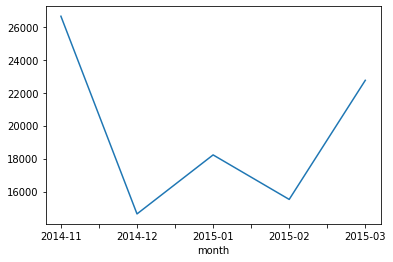

In [27]:
df_phone.groupby("month")["duration"].sum().plot()

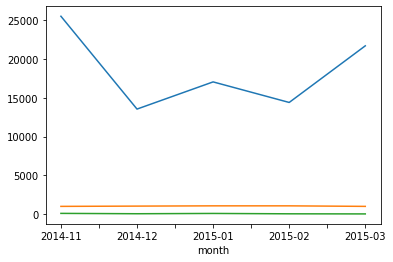

In [28]:
df_phone[df_phone["item"] == "call"].groupby("month")["duration"].sum().plot()
df_phone[df_phone["item"] == "data"].groupby("month")["duration"].sum().plot()
df_phone[df_phone["item"] == "sms"].groupby("month")["duration"].sum().plot()

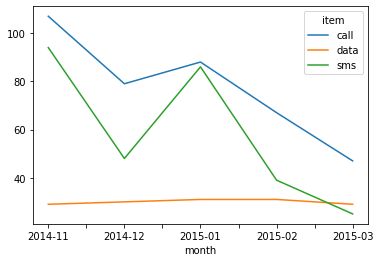

In [29]:
df_phone.groupby(["month", "item"])["duration"].count().unstack().plot()

In [30]:
df_phone.groupby(["month", "item"])["duration"].sum()

month    item
2014-11  call    25547.000
         data      998.441
         sms        94.000
2014-12  call    13561.000
         data     1032.870
         sms        48.000
2015-01  call    17070.000
         data     1067.299
         sms        86.000
2015-02  call    14416.000
         data     1067.299
         sms        39.000
2015-03  call    21727.000
         data      998.441
         sms        25.000
Name: duration, dtype: float64

In [31]:
df_phone.groupby(["month", "item"])["date"].count().unstack()

item,call,data,sms
month,,,
2014-11,107,29,94
2014-12,79,30,48
2015-01,88,31,86
2015-02,67,31,39
2015-03,47,29,25


In [32]:
df_phone.groupby("month", as_index=False).agg({"duration": "sum"})

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [33]:
df_phone.groupby(["month", "item"]).agg(
    {
        "duration": sum,  # find the sum of the durations for each group
        "network_type": "count",  # find the number of network type entries
        "date": "first",
    }
)  # get the first date per group

duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
        sms      48.000            48 2014-11-14 17:28:00
2015-01 call  17070.000            88 2014-12-15 20:03:00
        data   1067.299            31 2014-12-13 06:58:00
        sms      86.000            86 2014-12-15 19:56:00
2015-02 call  14416.000            67 2015-01-15 10:36:00
        data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-02-12 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

In [34]:
df_phone.groupby(["month", "item"]).agg(
    {
        "duration": [min],  # find the min, max, and sum of the duration column
        "network_type": "count",  # find the number of network type entries
        "date": [min, "first", "nunique"],
    }
)  # get the min, first, and number of unique dates

duration network_type                date                      \
                  min        count                 min               first   
month   item                                                                 
2014-11 call    1.000          107 2014-10-15 06:58:00 2014-10-15 06:58:00   
        data   34.429           29 2014-10-15 06:58:00 2014-10-15 06:58:00   
        sms     1.000           94 2014-10-16 22:18:00 2014-10-16 22:18:00   
2014-12 call    2.000           79 2014-11-14 17:24:00 2014-11-14 17:24:00   
        data   34.429           30 2014-11-13 06:58:00 2014-11-13 06:58:00   
        sms     1.000           48 2014-11-14 17:28:00 2014-11-14 17:28:00   
2015-01 call    2.000           88 2014-12-15 20:03:00 2014-12-15 20:03:00   
        data   34.429           31 2014-12-13 06:58:00 2014-12-13 06:58:00   
        sms     1.000           86 2014-12-15 19:56:00 2014-12-15 19:56:00   
2015-02 call    1.000           67 2015-01-15 10:36:00 2015-01-15 10:36:00   
        data   34.429           31 2015-01-13 06:58:00 2015-01-13 06:58:00   
        sms     1.000           39 2015-01-15 12:23:00 2015-01-15 12:23:00   
2015-03 call    2.000           47 2015-02-12 20:15:00 2015-02-12 20:15:00   
        data   34.429           29 2015-02-13 06:58:00 2015-02-13 06:58:00   
        sms     1.000           25 2015-02-19 18:46:00 2015-02-19 18:46:00   

                      
             nunique  
month   item          
2014-11 call     104  
        data      29  
        sms       79  
2014-12 call      76  
        data      30  
        sms       41  
2015-01 call      84  
        data      31  
        sms       58  
2015-02 call      67  
        data      31  
        sms       27  
2015-03 call      47  
        data      29  
        sms       17

In [35]:
grouped = df_phone.groupby("month").agg({"duration": [min, max, np.mean]})
grouped

duration                     
             min      max        mean
month                                
2014-11      1.0   1940.0  115.823657
2014-12      1.0   2120.0   93.260318
2015-01      1.0   1859.0   88.894141
2015-02      1.0   1863.0  113.301453
2015-03      1.0  10528.0  225.251891

In [36]:
grouped.columns = grouped.columns.droplevel(level=0)
grouped

,min,max,mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


In [37]:
grouped.rename(
    columns={"min": "min_duration", "max": "max_duration", "mean": "mean_duration"}
)

,min_duration,max_duration,mean_duration
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


In [38]:
grouped = df_phone.groupby("month").agg({"duration": [min, max, np.mean]})
grouped

duration                     
             min      max        mean
month                                
2014-11      1.0   1940.0  115.823657
2014-12      1.0   2120.0   93.260318
2015-01      1.0   1859.0   88.894141
2015-02      1.0   1863.0  113.301453
2015-03      1.0  10528.0  225.251891

In [39]:
grouped.columns = grouped.columns.droplevel(level=0)
grouped

,min,max,mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


In [40]:
grouped.add_prefix("duration_")

,duration_min,duration_max,duration_mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


In [41]:
df_phone

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,2015-03-13 00:38:00,1.000,sms,2015-03,world,world
826,826,2015-03-13 00:39:00,1.000,sms,2015-03,Vodafone,mobile
827,827,2015-03-13 06:58:00,34.429,data,2015-03,data,data
828,828,2015-03-14 00:13:00,1.000,sms,2015-03,world,world
